# Applications of word frequencies in finance

Text analysis in the financial area already has a long history with versatile applications. The first major contributions were based upon word frequencies and dictionary based approaches. When analyzing it is important to have some background knowledge in the financial domain. In this chapter, we take a look at some examples to get familiar with some domain specific characteristics. 

## Domain specific language matters

One of the most cited text analysis research articles is by [Loughrain and McDonald (2011)](https://www.uts.edu.au/sites/default/files/ADG_Cons2015_Loughran%20McDonald%20JE%202011.pdf) which was mentioned in the last chapter. Their paper addresses issues with existing word classification methods used for analyzing the tone in financial texts, particularly 10-K reports. The research focuses on how the widely used Harvard Psychosociological Dictionary (H4N) misclassifies words when applied to financial contexts. Specifically, about 73.8% of the words deemed “negative” by the Harvard list, such as “tax,” “liability,” or “cost,” are not necessarily negative in financial contexts but rather commonly used terms in business.

The authors argue that such misclassification introduces noise into tone analysis and develop a new word list, “Fin-Neg,” tailored to the financial setting. The Fin-Neg list consists of words that genuinely have negative connotations in finance, such as “felony,” “litigation,” and “misstatement.” They find that using this list results in stronger correlations with financial variables like returns, trading volume, and volatility than the Harvard list. Their analysis also extends to additional word lists covering positive, uncertainty, and litigious tones, among others.

By examining over 50,000 10-K reports filed from 1994 to 2008, the paper demonstrates that Fin-Neg provides a more accurate reflection of negative sentiment and shows a stronger relation to stock price reactions and financial outcomes during the 10-K filing period.

Among different variables in their paper, they examine if a relationship between the number of negative words in a 10-K report and the corresponding stock market reaction around the filing date of the report exists. Let $s_{t, }$ be the stock price of a company, then $r_{t, i}$

$$
r_{t, i} = \frac{s_{t, i} - s_{t-1, i}}{s_{t-1, i}} = \frac{s_{t, i}}{s_{t-1, i}} - 1
$$

is the discrete return between two time periods $t, t-1$. Furthermore, $r{t, b}$ represents the return at the same point in time of a reasonable benchmark, e.g., a broad stock market index. The excess return is given by the difference:

$$
\tilde{r}_{t, i} = r_{t, i} - r_{t, b}
$$

Stock market reactions are quantified by the excess return around the event date (the day the report is filed). This period is called event period or event window. For instance, a popular choice is a four day event window which determines the excess return between $t-1$ and $t+2$. The benchmark chosen in most of the studies (using data from the United States) is the value weighted buy-and-hold CRSP index. CRSP is a data provider that has a broad set of stock market data with long historical access, including listed and de-listed stocks. Thus, this is an index which captures the aggregate market development. Note, that this is an important and domain specific issue. Stock price changes on equity markets tend to co-move together, which leads to positive correlation between company returns and systematic market movements. For instance, market participants refer to bear and bull markets during times when the majority of all companies experiences an increase and decrease of its market value, respectively. Thus, to isolate the company development over an event window from systematic market movements, one can use the excess return as described above. Other ways can be chosen to control for systematic developments, e.g., the use of abnormal returns which describe the difference between the observed and the expected return. Hereby, the expected return is usually determined by a model which relates the company return to factors that are known to capture systematic stock market movements. 

In their paper Loughrain and McDonald (2011), use a regression analysis to examine if negative tone in 10-K filings has an impact on the stock market reaction (excess return).

$$
\tilde{r}_{t, i} = \beta_0 + \beta_1 \text{tone}_{t, i} + \beta_2 \log \text{size}_{t, i} + \beta_3 \log \text{btm}_{t, i} + \beta_4 \log \text{turnover}_{t, i} + \beta_5 \text{FF}_{t, i} + \beta_6 \text{InstOwn}_{t, i} + \beta_7 \text{Nasdaq}_{t, i} + \epsilon_{t, i}
$$

The parameter which is of interest is $\beta_1$ because it measures the impact of the tone in the filing on the stock market reaction. In their analysis, tone is the number of negative words according to their domain specific dictionary divided by the number of words in a report. As an alternative, they also conduct the analysis with and a term-frequency inverse-document-frequency weighted count of negative words. Other variables are called control variables and must be included to measure the impact of tone more precisely. For instance, if a company is bigger, it is likely that more investors pay attention towards their reports and investors act quicker and more accurate to information shared in the report. The size is usually quantified by the natural log of the market capitalization. The book-to-market value (btm) is another control variable which is the ratio between the equity value according to the balance sheet of a company and its value according to the stock market (market capitalization). The (share) turnover is the relation of volume traded in the year before the filing to the number of outstanding shares of a company. A high value reflects many ownership changes. The variable FF stands for Fama-French alpha and refers to a popular model in finance. It measures if a company experienced surprisingly good and bad returns in the more recent history. The variable InstOwn stands for institutional ownership and describes the fraction of institutional owners of the company in the quarter before the filing. The higher it is, the more attention is paid to the company by professional investors which may also lead to more accurate or at least stronger stock market reactions in both possible directions. The Nasdaq variable is a dummy variable which is equal to one for companies which are listed at the Nasdaq exchange and zero otherwise.

Please note, that we can not go into econometric details, however, such regression analysis usually control for clustering in the data and potential omitted variables. Examples how to do this are the used of fixed effects regression and corrections of standard errors. Take a look at this [online book](https://www.tidy-finance.org/python/fixed-effects-and-clustered-standard-errors.html) for a more detailed explanation.

If we take a look at Table IV in the paper, we observe that the domain specific tone has a larger effect than if it is determined with a general purpose dictionary. This is an important result as it shows that text analysis can benefit from the usage of domain specific language models. At the same time, when looking at the coefficient of determination $R^2$ which in general is defined by:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

The low values in the analysis highlight, that only little variation of stock market reactions can be explained by tone and control variables. This demonstrates another more general challenge for financial text analysis, a high noise-to-signal ratio. This means that it is really difficult to quantify the importance of textual information precisely.





To understand this type of analysis a little better, we take a look at an own analysis. The data includes 1966 companies with annual 10-K reports between 2002 and 2024. Not every company exists over the whole period. On average we have almost ten reports over the time period. For every company we collect the market capitalization and book to market value at the filing date. The excess return is the four day event return over the market portfolio provided by [Kenneth French data site](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) between $t-1$ and $t+2$, where $t$ represents the filing date. For every report, we count the number of negative words according to the [Loughrain-McDonald dictionary](https://sraf.nd.edu/loughranmcdonald-master-dictionary/). and determine the relative frequency of negative words. The cell below exhibits descriptive statistics for 19125 firm year observations. While the average and median excess return is around zero it varies between $-0.98$ and $0.41$. Size is given by the log of market cap. Note that negative book to market values imply a negative equity value, meaning liabilities are larger than assets. However, as long as the company is not legally insolvent and can fulfill its obligations, it can continue its business operations. Negative word frequencies are between zero and $0.055$. The average report has a length of around 50,000 words. Note that each report is relatively simply preprocessed, i.e., removal of numbers and punctuation, lower casing and splitting into words by whitespaces. 

In [1]:
import pandas as pd

lmcd_regression_data = pd.read_parquet("../analysis/lmcd_regression_data.parquet")
lmcd_regression_data["freq_negative"] = lmcd_regression_data["negative"] / lmcd_regression_data["n_words"] 
lmcd_regression_data["Date"] = pd.to_datetime(lmcd_regression_data["Date"])
lmcd_regression_data["year_month"] = [str(dt.year) + "_" + str(dt.month) for dt in  lmcd_regression_data.Date]
lmcd_regression_data['neg_freq_quintile'] = pd.qcut(lmcd_regression_data['freq_negative'], 5, labels = [f"Q{i+1}" for i in range(5)])
lmcd_regression_data.get(["ex_r_t", "Size", "BTM", "freq_negative", "n_words"]).describe()

,ex_r_t,Size,BTM,freq_negative,n_words
count,19125.000000,19125.000000,19125.000000,19125.000000,19125.000000
mean,-0.000755,22.609088,0.471917,0.016800,51537.597490
std,0.048978,1.423160,0.601495,0.004740,26364.465927
min,-0.983018,16.232908,-7.332997,0.000000,347.000000
25%,-0.017244,21.555226,0.208206,0.013751,35661.000000
50%,0.000015,22.464324,0.377686,0.016640,48319.000000
75%,0.017682,23.551008,0.627358,0.019511,63123.000000
max,0.409557,28.776384,46.641317,0.055189,388143.000000


Figure 1 of the original paper shows a clear negative relationship between firms sorted into quintiles according to the negative word frequencies and excess returns. We do the same. If you are not familiar with such a procedure, we sort all observations (over time and companies) of negative word frequencies and split this data set into five equally sized parts. For every part, we determine the median of excess returns. This is what you can observe below. In comparison to the original paper, we still observe a negative relationship, however, it is less strict pronounced. 

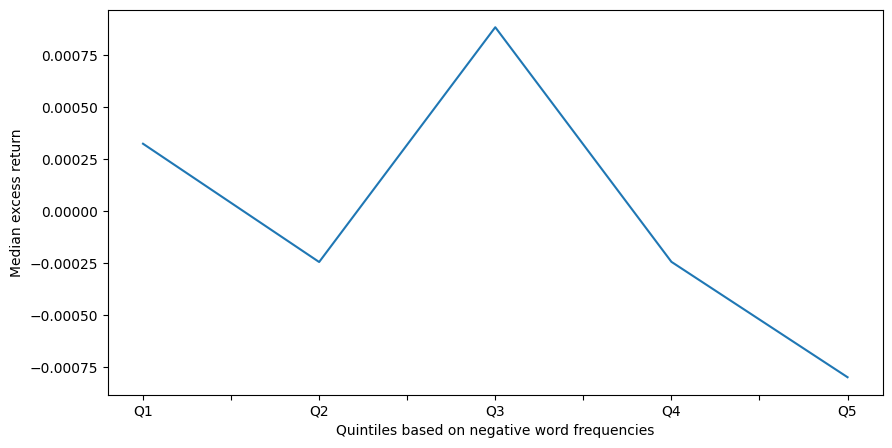

In [29]:
neg_quintiles_fig = lmcd_regression_data.loc[:, ["ex_r_t", 'neg_freq_quintile']].groupby("neg_freq_quintile", observed = True).median().plot(figsize = (10, 5), xlabel = "Quintiles based on negative word frequencies", ylabel = "Median excess return", legend = False)

Last, we conduct three regression analysis:

$$
\tilde{r}_{t, i} = \beta_0 + \beta_1 \text{tone}_{t, i} + \beta_2 \log \text{size}_{t, i} + \beta_3 \log \text{btm}_{t, i} + \epsilon_{t, i} \\
\tilde{r}_{t, i} = \beta_i + \beta_1 \text{tone}_{t, i} + \beta_2 \log \text{size}_{t, i} + \beta_3 \log \text{btm}_{t, i} + \epsilon_{t, i} \\
\tilde{r}_{t, i} = \beta_i + \beta_t + \beta_1 \text{tone}_{t, i} + \beta_2 \log \text{size}_{t, i} + \beta_3 \log \text{btm}_{t, i} + \epsilon_{t, i} \\
$$

The first model is a benchmark, which does not include any fixed effects, the second includes firm fixed effects ($\beta_i$) and the last model includes firm and time fixed effects ($\beta_i, \beta_t$) controlling for the averages of excess returns by firm and by time. The time is defined by year-month which means the average of all excess returns for a specific month in a specific year is taken into account when estimating the impact of negative word frequencies ($\text{tone}$). Furthermore, standard errors are corrected for potential cluster of firms and years.

The results are shown in the cell below. The estimated $\beta$ coefficients are reported with t-statistics (in brackets). We do not find a significant impact of the tone on excess returns. Without firm or time fixed effects almost no variation in excess returns can be explained. When controlling for firm and time effects, the sign of tone switches from positive to negative which is the opposite of the original finding. Overall, we do not find any evidence that stock market participants react to negative tone measured by the Loughrain and McDonald dictionary anymore. 

In [27]:
import pyfixest as pf


model_ols = pf.feols(
    "ex_r_t ~ freq_negative + Size + BTM",
    vcov = {"CRV1": "RIC + year_month"},
    data = lmcd_regression_data
)

model_fe_firm = pf.feols(
    "ex_r_t ~ freq_negative + Size + BTM | RIC",
    vcov = {"CRV1": "RIC + year_month"},
    data = lmcd_regression_data
)

model_fe_firmyear = pf.feols(
    "ex_r_t ~ freq_negative + Size + BTM | RIC + year_month",
    vcov = {"CRV1": "RIC + year_month"},
    data = lmcd_regression_data
)

pf.etable([model_ols, model_fe_firm, model_fe_firmyear], coef_fmt = "b (t)")

GT(_tbl_data=  level_0        level_1                   0                   1  \
0    coef  freq_negative     -0.003 (-0.038)     -0.006 (-0.051)   
1    coef           Size      0.001* (2.122)     0.003** (2.692)   
2    coef            BTM     -0.005 (-1.743)     -0.004 (-1.232)   
3    coef      Intercept     -0.016 (-1.858)                       
4      fe            RIC                   -                   x   
5      fe     year_month                   -                   -   
6   stats   Observations               19125               19125   
7   stats      S.E. type  by: RIC+year_month  by: RIC+year_month   
8   stats  R<sup>2</sup>               0.004               0.147   

                    2  
0       0.150 (1.244)  
1     0.004** (3.069)  
2     -0.004 (-1.099)  
3                      
4                   x  
5                   x  
6               19125  
7  by: RIC+year_month  
8               0.169  , _body=<great_tables._gt_data.Body object at 0x3816c32d0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x381649c50>, _spanners=Spanners([SpannerInfo(spanner_id='ex_r_t', spanner_level=1, spanner_label='ex_r_t', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=[''], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x38164a4d0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='